# SMA

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [2]:
myticker = ['SPGI']
#tickers = ['AAPL','WMT','META','AMZN']

df = pdr.get_data_yahoo(myticker, start='2023-04-12')['Close']
df.columns = {'Close Price'}
df.head(10)

[*********************100%%**********************]  1 of 1 completed


Date
2023-04-12    342.790009
2023-04-13    347.869995
2023-04-14    347.859985
2023-04-17    349.010010
2023-04-18    352.170013
2023-04-19    352.029999
2023-04-20    352.910004
2023-04-21    351.720001
2023-04-24    347.660004
2023-04-25    345.209991
Name: Close, dtype: float64

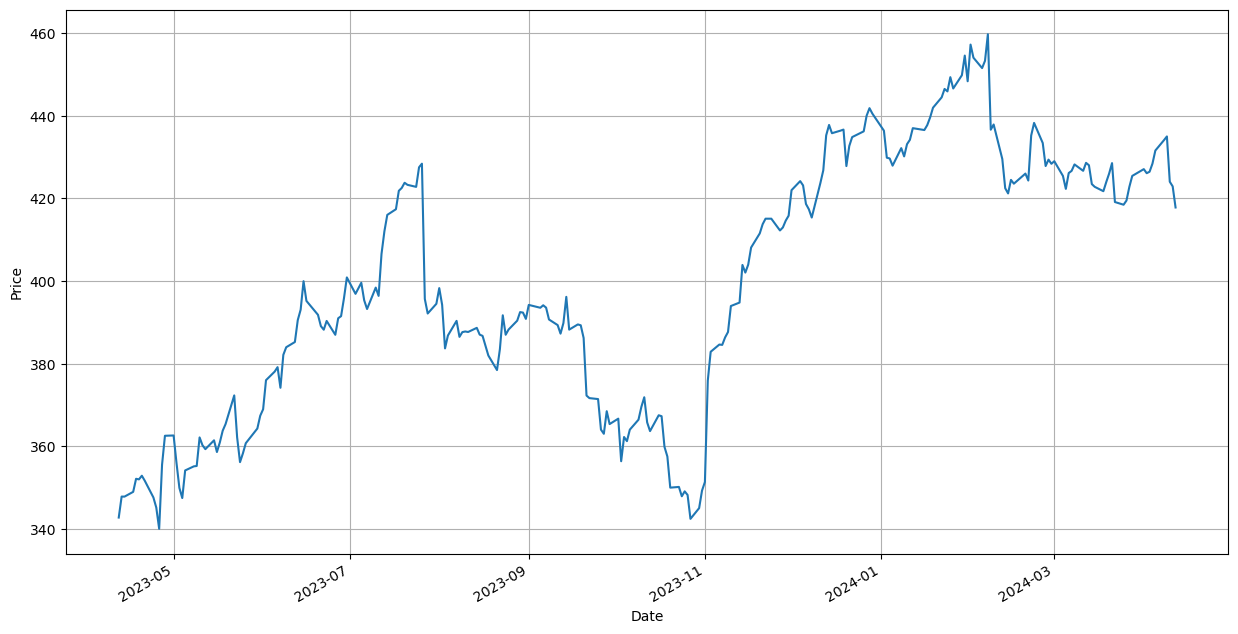

In [3]:
df.plot(figsize =(15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [4]:
df = pd.DataFrame(df)
df

Close
Date                  
2023-04-12  342.790009
2023-04-13  347.869995
2023-04-14  347.859985
2023-04-17  349.010010
2023-04-18  352.170013
...                ...
2024-04-08  434.109985
2024-04-09  435.000000
2024-04-10  424.040009
2024-04-11  422.920013
2024-04-12  417.809998

[253 rows x 1 columns]

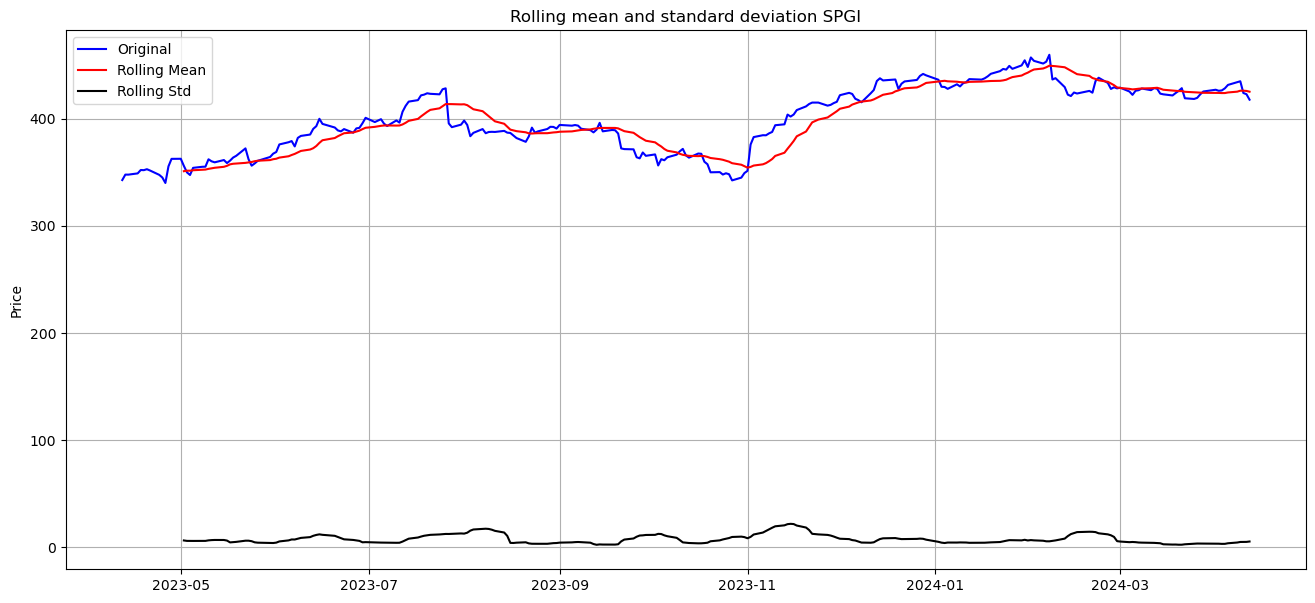

In [5]:
rolling_mean = df['Close'].rolling(15).mean()
rolling_std = df['Close'].rolling(15).std()

plt.figure(figsize = (16, 7))
fig=plt.figure(1)

orig = plt.plot(df['Close'],color='blue',label='Original')
mean = plt.plot(rolling_mean,color='red',label='Rolling Mean')
std = plt.plot(rolling_std,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation ' + 'SPGI')
plt.grid()
plt.ylabel("Price")
plt.show()


In [6]:
# create 20 days simple moving average column
df['SMA20'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['SMA50'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df.head()

Close       SMA20       SMA50
Date                                          
2023-04-12  342.790009  342.790009  342.790009
2023-04-13  347.869995  345.330002  345.330002
2023-04-14  347.859985  346.173330  346.173330
2023-04-17  349.010010  346.882500  346.882500
2023-04-18  352.170013  347.940002  347.940002

In [7]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1.0, 0.0)
#When "SMA20" is larger than "SMA50," this code sets "Signal" 
#to 1.0; otherwise, it sets "Signal" to 0.0, signifying a moving average crossover.

In [8]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

Close       SMA20       SMA50  Signal  Position
Date                                                            
2023-04-12  342.790009  342.790009  342.790009     0.0       NaN
2023-04-13  347.869995  345.330002  345.330002     0.0       0.0
2023-04-14  347.859985  346.173330  346.173330     0.0       0.0
2023-04-17  349.010010  346.882500  346.882500     0.0       0.0
2023-04-18  352.170013  347.940002  347.940002     0.0       0.0

To indicate possible purchase (1) or sell (-1) signals based on the difference between nearby values in the 'Signal' column, the code adds a new column called 'Position' to the DataFrame df. This column indicates changes in the 'Signal' column across consecutive rows.

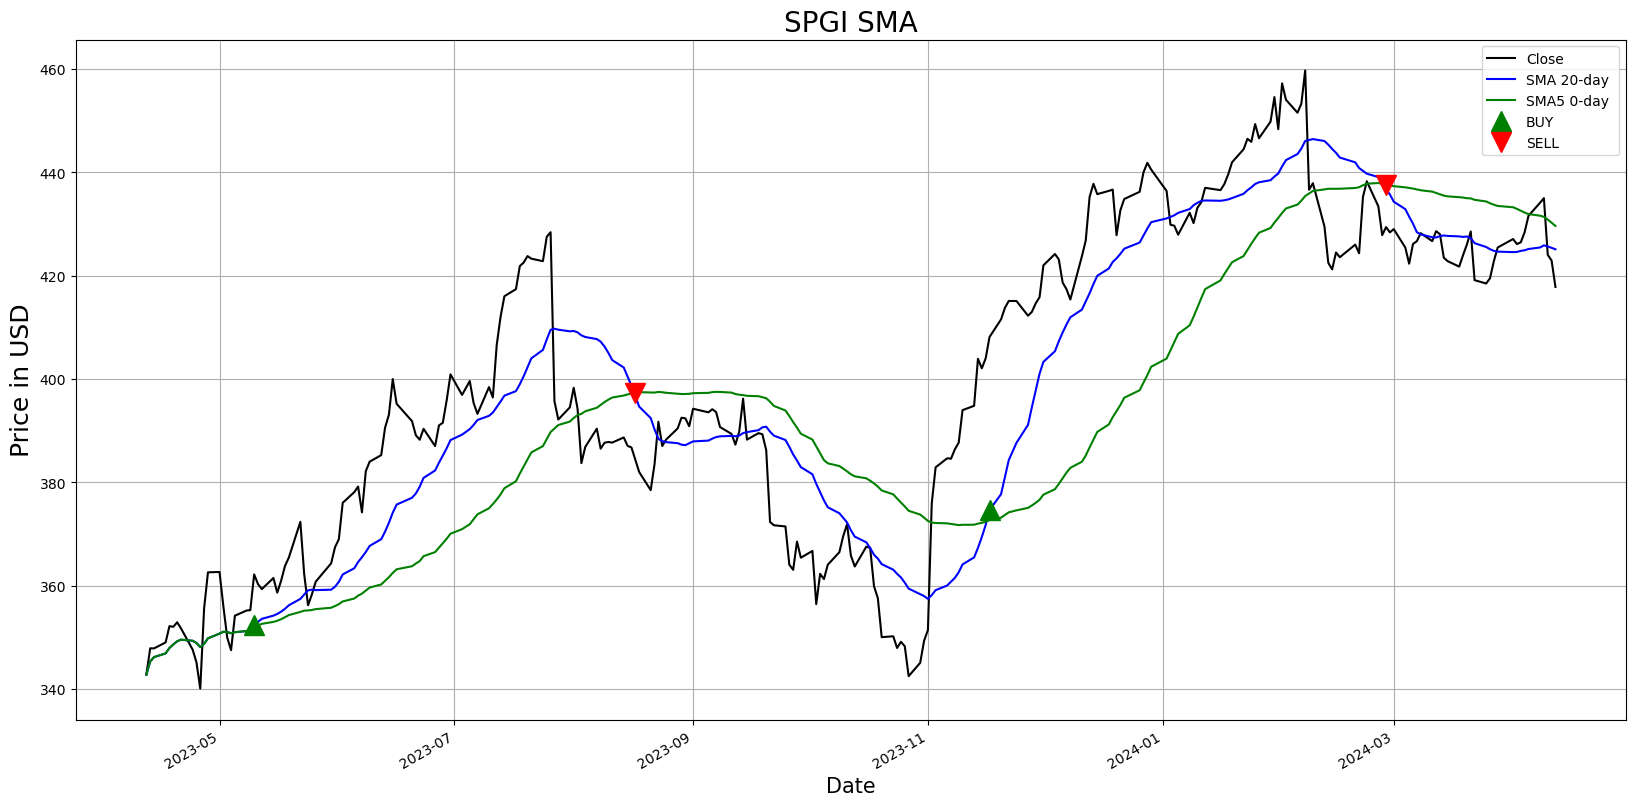

In [9]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close') 
df['SMA20'].plot(color = 'b',label = 'SMA 20-day ') 
df['SMA50'].plot(color = 'g', label = 'SMA5 0-day ')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['SMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'BUY')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['SMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'SELL')
plt.ylabel('Price in USD', fontsize = 18 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPGI SMA', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [10]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+----------+------------+
| Date                |   Close |   SMA20 |   SMA50 |   Signal | Position   |
|---------------------+---------+---------+---------+----------+------------|
| 2023-05-10 00:00:00 |  362.18 | 352.382 | 351.925 |        1 | Buy        |
| 2023-08-17 00:00:00 |  384.38 | 396.721 | 397.297 |        0 | Sell       |
| 2023-11-17 00:00:00 |  408.12 | 374.637 | 372.717 |        1 | Buy        |
| 2024-02-28 00:00:00 |  429.39 | 436.722 | 437.615 |        0 | Sell       |
+---------------------+---------+---------+---------+----------+------------+


# EMA

In [11]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sb
!pip install yfinance

import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

In [12]:
#Load tickers variable for amazon
tickers = 'SPGI'

In [13]:
start_date = '2023-04-12'

In [14]:
tickers = 'SPGI'
mydata = pdr.get_data_yahoo(tickers, start = start_date)['Close']
mydata

[*********************100%%**********************]  1 of 1 completed


Date
2023-04-12    342.790009
2023-04-13    347.869995
2023-04-14    347.859985
2023-04-17    349.010010
2023-04-18    352.170013
                 ...    
2024-04-08    434.109985
2024-04-09    435.000000
2024-04-10    424.040009
2024-04-11    422.920013
2024-04-12    417.809998
Name: Close, Length: 253, dtype: float64

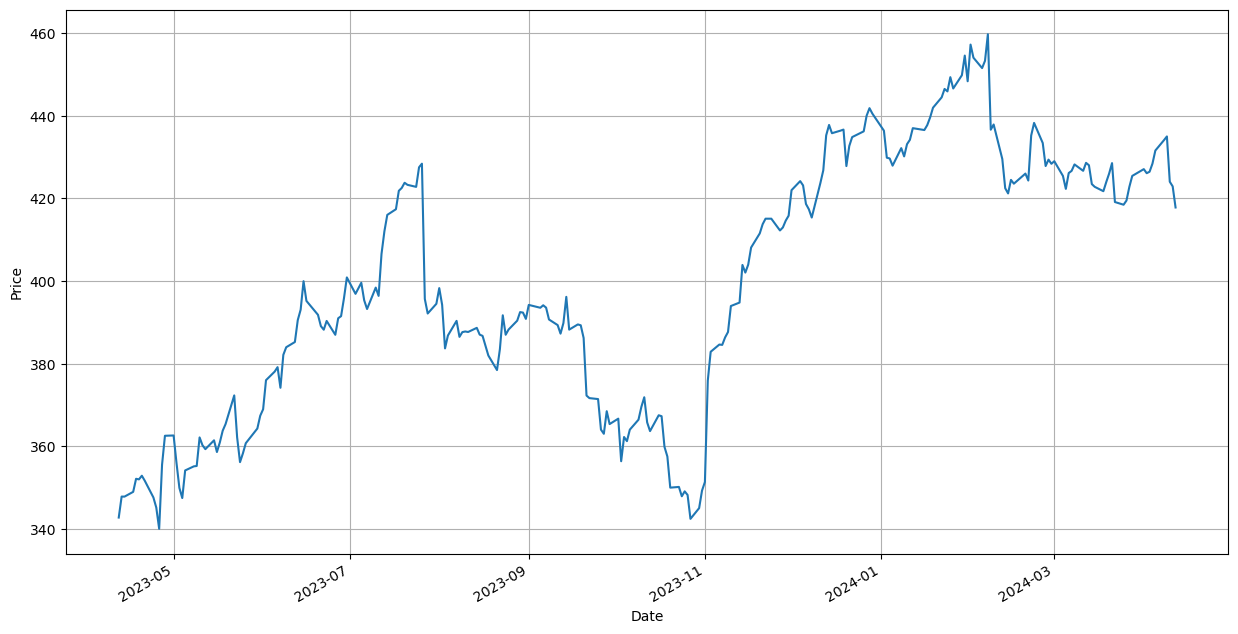

In [15]:
mydata.plot(figsize = (15, 8))
plt.grid()
plt.ylabel('Price')
plt.show()

In [16]:
df['EMA20'] = df['Close'].ewm(span = 20, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-12 to 2024-04-12
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     253 non-null    float64
 1   SMA20     253 non-null    float64
 2   SMA50     253 non-null    float64
 3   Signal    253 non-null    float64
 4   Position  252 non-null    float64
 5   EMA20     253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [17]:
df['EMA50'] = df['Close'].ewm(span = 50, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-04-12 to 2024-04-12
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     253 non-null    float64
 1   SMA20     253 non-null    float64
 2   SMA50     253 non-null    float64
 3   Signal    253 non-null    float64
 4   Position  252 non-null    float64
 5   EMA20     253 non-null    float64
 6   EMA50     253 non-null    float64
dtypes: float64(7)
memory usage: 15.8 KB


In [18]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [19]:
df['Position'] = df['Signal'].diff()

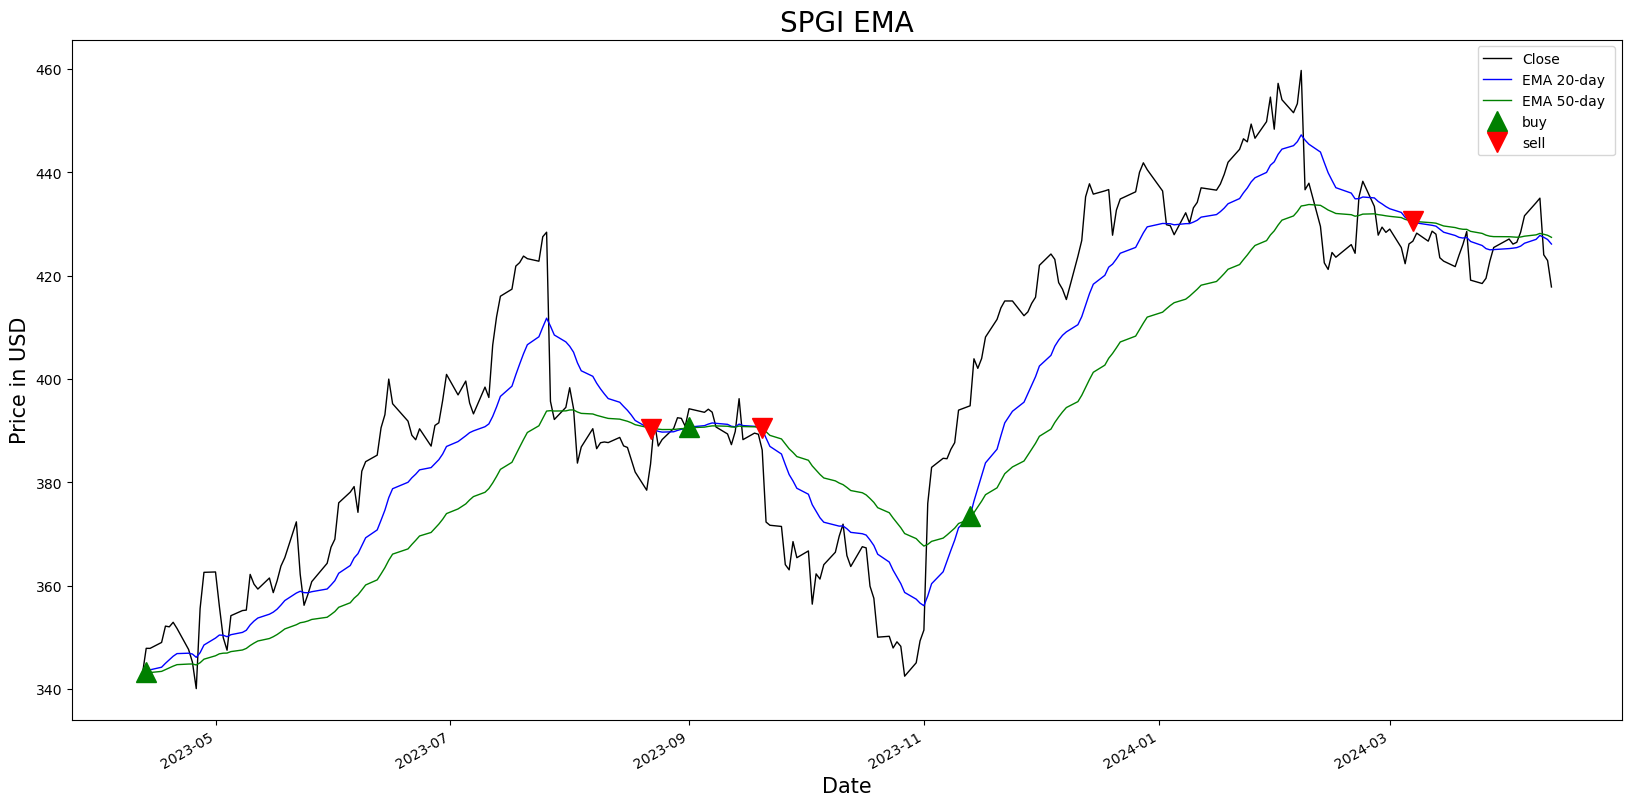

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize = (20, 10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPGI EMA' , fontsize = 20)
plt.legend()
plt.figure()
plt.show()

In [21]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+---------+---------+----------+------------+---------+---------+
| Date                |   Close |   SMA20 |   SMA50 |   Signal | Position   |   EMA20 |   EMA50 |
|---------------------+---------+---------+---------+----------+------------+---------+---------|
| 2023-04-13 00:00:00 |  347.87 | 345.33  | 345.33  |        1 | Buy        | 343.274 | 342.989 |
| 2023-08-22 00:00:00 |  383.54 | 390.241 | 397.37  |        0 | Sell       | 390.009 | 390.376 |
| 2023-09-01 00:00:00 |  394.24 | 387.918 | 397.253 |        1 | Buy        | 390.698 | 390.563 |
| 2023-09-20 00:00:00 |  386.24 | 390.772 | 396.281 |        0 | Sell       | 390.273 | 390.513 |
| 2023-11-13 00:00:00 |  394.81 | 365.474 | 371.796 |        1 | Buy        | 373.46  | 372.921 |
| 2024-03-07 00:00:00 |  426.67 | 428.411 | 436.69  |        0 | Sell       | 430.407 | 430.549 |
+---------------------+---------+---------+---------+----------+------------+---------+---------+


# Monti carlos

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [23]:

ticker = ['SPGI']
df_yf = pdr.get_data_yahoo(ticker, start='2023-04-12', end = '2024-04-11')['Adj Close']
df_yf

[*********************100%%**********************]  1 of 1 completed


Date
2023-04-12    339.682373
2023-04-13    344.716309
2023-04-14    344.706390
2023-04-17    345.846008
2023-04-18    348.977325
                 ...    
2024-04-04    428.420013
2024-04-05    431.589996
2024-04-08    434.109985
2024-04-09    435.000000
2024-04-10    424.040009
Name: Adj Close, Length: 251, dtype: float64

<Axes: xlabel='Date'>

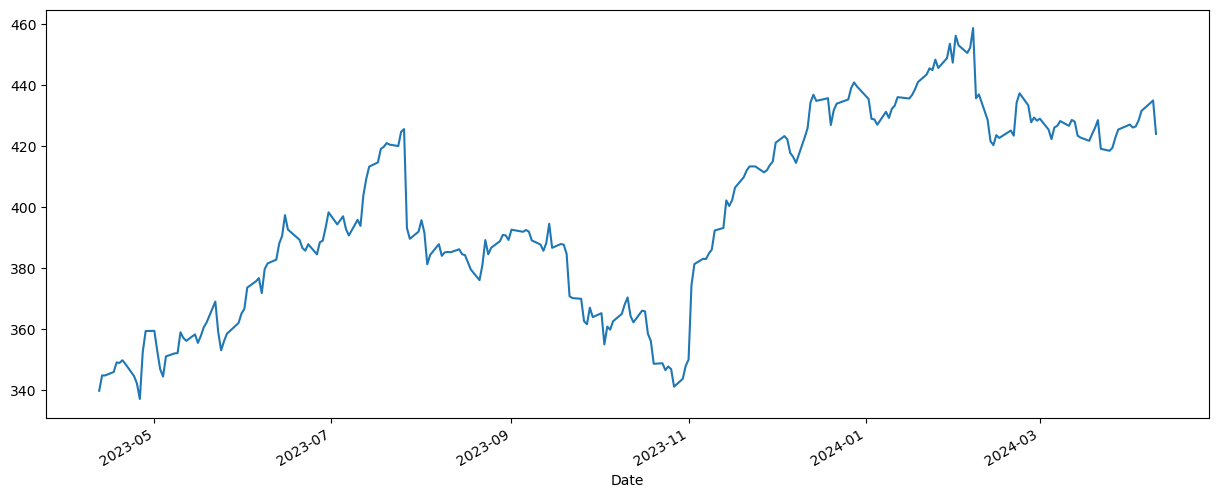

In [24]:
df_yf.plot(figsize = [15,6])

Text(0, 0.5, 'Frequency')

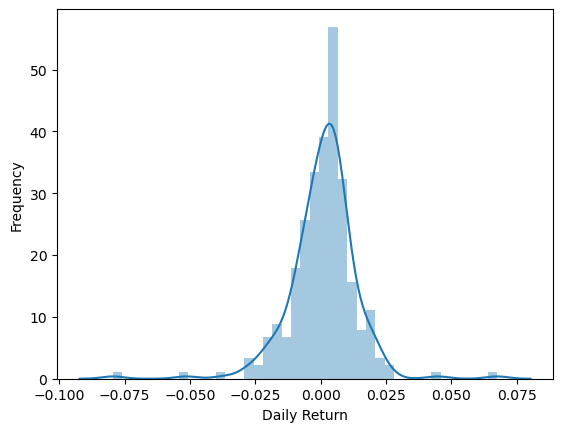

In [25]:
stock_returns = np.log(1+df_yf.pct_change())
stock_returns.tail()
sns.distplot(stock_returns.iloc[1:])
plt.xlabel ("Daily Return")
plt.ylabel ("Frequency")

<Axes: xlabel='Date'>

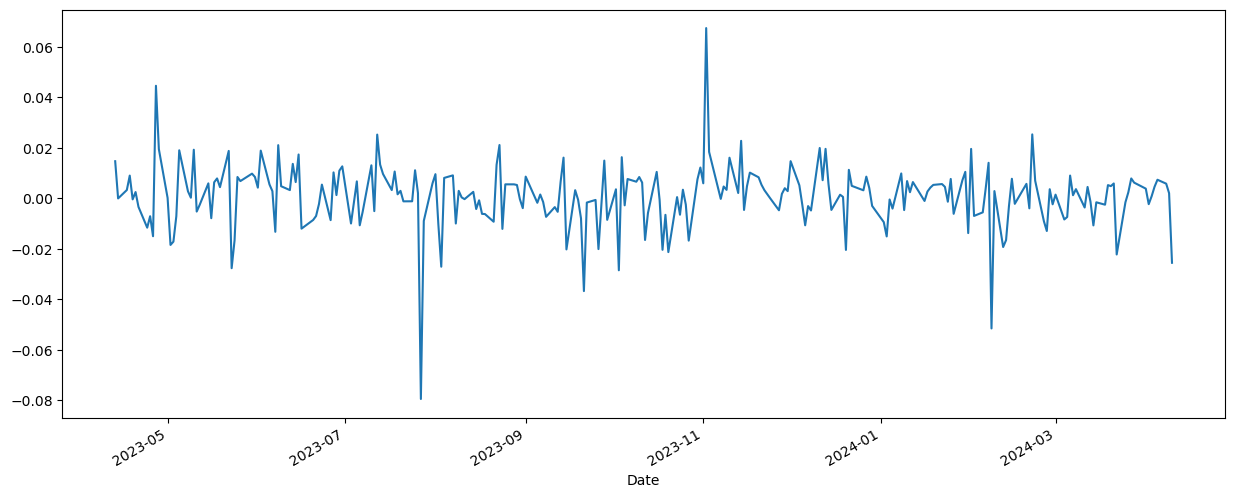

In [26]:
stock_returns.plot(figsize=(15,6))

In [27]:
u =stock_returns.mean()
var = stock_returns.var()
drift = u - (0.5*var)
drift


0.0008044672188511098

In [28]:
stddev = stock_returns.std()
stddev


0.012868573126181178

In [29]:
type(drift)
type(stddev)

float

In [30]:
np.array(drift)
x = np.random.rand(10,2)
x


array([[0.85631905, 0.04703496],
       [0.64973643, 0.01167643],
       [0.50261951, 0.98202539],
       [0.78945126, 0.4069614 ],
       [0.75059886, 0.66914597],
       [0.32871135, 0.89505118],
       [0.01997053, 0.83778438],
       [0.38067427, 0.90574959],
       [0.59508062, 0.17947225],
       [0.59515345, 0.82686357]])

In [31]:
norm.ppf(x)
stdev = stock_returns.std()
days = 250
iterations = 100
Z = norm.ppf(np.random.rand(days, iterations))
get_daily_returns = np.exp(drift +stdev * Z)
get_daily_returns

array([[0.97899955, 0.98509927, 0.977175  , ..., 1.00905946, 1.00302243,
        1.00489439],
       [1.01734877, 1.02211153, 0.99162803, ..., 1.00173158, 0.99028152,
        1.00110498],
       [0.99791519, 1.00436809, 0.99686941, ..., 0.99155622, 0.99065299,
        1.00775291],
       ...,
       [0.9950079 , 1.0167083 , 1.0068396 , ..., 1.00494947, 0.99266942,
        1.01786957],
       [1.00011669, 1.01171143, 0.98871145, ..., 0.99516423, 1.0111831 ,
        1.01852267],
       [0.99798912, 0.98429407, 0.98417989, ..., 0.99613371, 0.99663291,
        1.02144778]])

In [32]:
len (get_daily_returns)

250

In [33]:
S0 = df_yf.iloc[-1]
S0

424.0400085449219

In [34]:
price_paths = np.zeros_like(get_daily_returns)
price_paths
price_paths[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
price_paths[0] = S0
price_paths

array([[424.04000854, 424.04000854, 424.04000854, ..., 424.04000854,
        424.04000854, 424.04000854],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [36]:
for t in range (1, days):
    price_paths[t] = price_paths[t-1]*get_daily_returns[t]
price_paths

array([[424.04000854, 424.04000854, 424.04000854, ..., 424.04000854,
        424.04000854, 424.04000854],
       [431.39658025, 433.41618269, 420.48995841, ..., 424.77426927,
        419.91898449, 424.50856431],
       [430.49720046, 435.30938495, 419.17357812, ..., 421.18756922,
        415.9939983 , 427.79974024],
       ...,
       [443.58117941, 365.97389548, 657.14903773, ..., 448.16853992,
        377.63621591, 424.50353762],
       [443.63294119, 370.25997435, 649.73077527, ..., 446.00129916,
        381.85935982, 432.36647797],
       [442.74084773, 364.44469619, 639.45196502, ..., 444.27692885,
        380.57360644, 441.63977691]])

Text(0.5, 1.0, 'Price Paths Simulation:Monte Carlo')

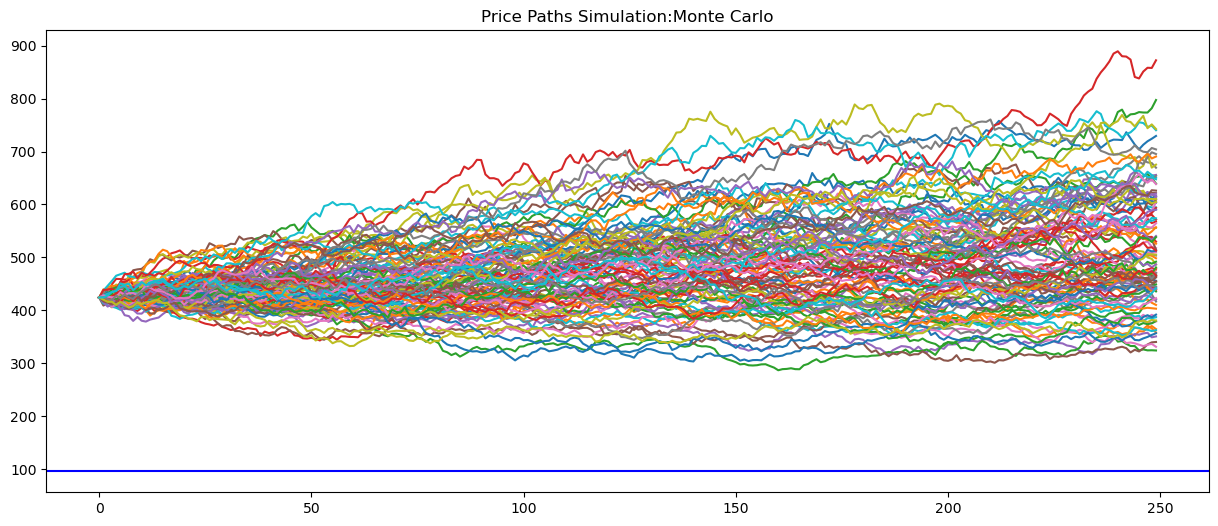

In [37]:
plt.figure(figsize=(15,6))
plt.axhline(y = 95.820000, color = 'b', linestyle = '-')
plt.plot(pd.DataFrame(price_paths).iloc[:,0:100])
plt.title('Price Paths Simulation:Monte Carlo')

# FB Prophet

In [38]:
# Python
import pandas as pd
from prophet import Prophet

In [39]:
df = pd.read_csv('SPGI_2.csv')

In [40]:
df = df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

In [41]:
df.head()

ds        Open        High         Low       Close           y  \
0  2023-04-12  346.470001  347.809998  341.760010  342.790009  339.682373   
1  2023-04-13  344.320007  348.250000  343.140015  347.869995  344.716309   
2  2023-04-14  347.700012  350.119995  346.089996  347.859985  344.706421   
3  2023-04-17  346.589996  349.859985  345.589996  349.010010  345.846008   
4  2023-04-18  350.000000  352.859985  347.579987  352.170013  348.977356   

    Volume  
0   903100  
1   732900  
2   960000  
3   863600  
4  1223800

In [42]:
m = Prophet()
m.fit(df)

21:20:11 - cmdstanpy - INFO - Chain [1] start processing
21:20:11 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
612 2025-04-07
613 2025-04-08
614 2025-04-09
615 2025-04-10
616 2025-04-11

In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
612 2025-04-07  330.489738   -0.501561  697.961684
613 2025-04-08  329.890295   -5.208355  696.385025
614 2025-04-09  329.587320   -5.087265  687.389646
615 2025-04-10  329.352255   -8.648000  698.036157
616 2025-04-11  329.407441  -10.211821  698.543749

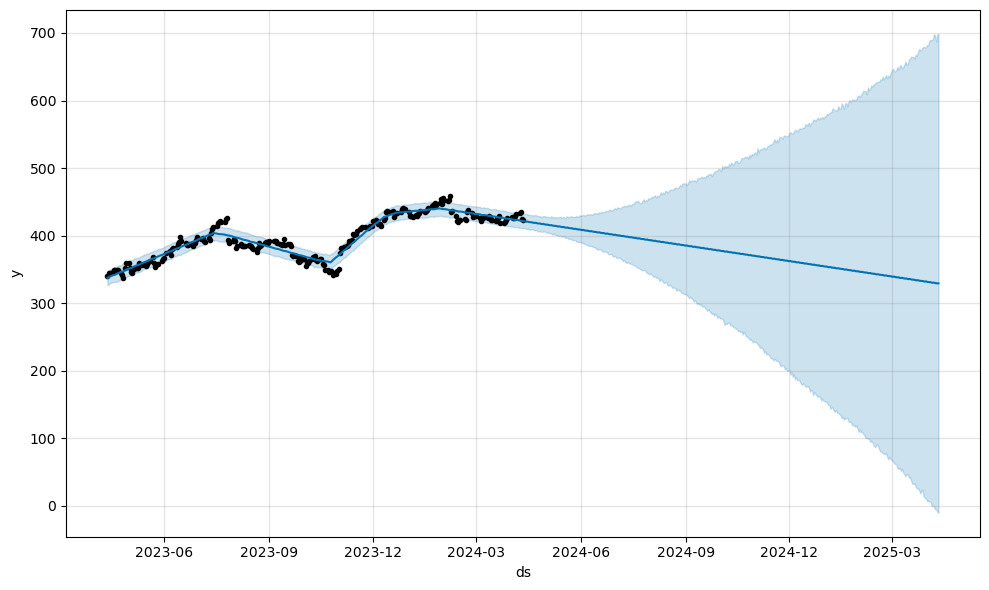

In [45]:
fig1 = m.plot(forecast)

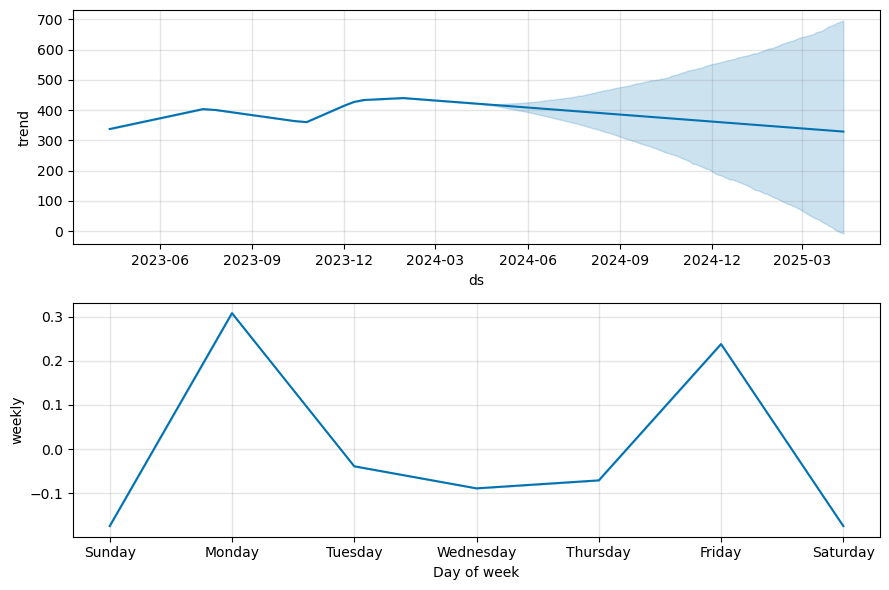

In [46]:
fig2 = m.plot_components(forecast)

In [47]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [48]:
plot_components_plotly(m, forecast)